In [26]:
!pip install opencv-python
!pip install seaborn

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import cv2
import os

# filename1 = "./image/piecewise_smooth_clean.png"
# filename2 = "./image/piecewise_smooth_noisy.png"
# filename3 = "./image/piecewise_smooth_denoise.png"
filename1 = "./image/piecewise_affine_clean.png"
filename2 = "./image/piecewise_affine_noisy.png"
filename3 = "./image/piecewise_affine_denoise.png"
img1 = cv2.imread(filename1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(filename2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(filename3, cv2.IMREAD_GRAYSCALE)


def showImage(img, savename):
    x, y = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))
    
    # fig = plt.figure(figsize=(10,5))
    fig = sns.mpl.pyplot.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    ax.imshow(img, cmap="gray")

    elevation = 30
    azimuth = 60

    ax = fig.add_subplot(122, projection='3d')
    ax.view_init(elevation, azimuth)
    # ax.plot_surface(x, y, img, cmap="bwr", linewidth=0)
    ax.plot_wireframe(x, y, img, cstride=10, rstride=10)

    plt.savefig(savename)
    # ims = []
    # for azimuth in range(0, 360, 30):
    #     im = ax.plot_surface(x, y, img, cmap="bwr", linewidth=0)
    #     ims.append(im)
    # ani = animation.ArtistAnimation(fig, ims, interval=1000)
    # ani.save("anim.gif", write="imagemagick", fps=4)
    # fig.show()

showImage(img1, "{}_wire.png".format(os.path.splitext(filename1)[0]))
showImage(img2, "{}_wire.png".format(os.path.splitext(filename2)[0]))
showImage(img3, "{}_wire.png".format(os.path.splitext(filename3)[0]))

# print(np.mean(np.abs(img1.astype(np.int) - img3.astype(np.int))))

[[ 0.0142189  0.0228057  0.0252789 ...,  0.0384088  0.0384078  0.0384066]]


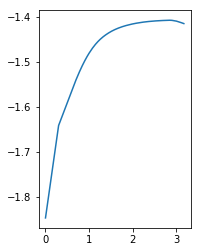

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# csv_fname1 = "./csv/piecewise_affine_error.dat"
# csv_fname2 = "./csv/piecewise_affine_obj_val.dat"
csv_fname1 = "./csv/output/piecewise_smooth_error.dat"
csv_fname2 = "./csv/output/piecewise_smooth_obj_val.dat"

def show_error(fname):
    df = pd.read_csv(fname, header=None)
    ar = df.values[:, :-1].astype(np.float64)

    x = np.arange(1, ar.size + 1)

    # fig = plt.figure()
    fig = sns.mpl.pyplot.figure()
    ax = fig.add_subplot(121)

    print(ar)

    ax.plot(np.log10(x), np.log10(ar[0, :]))


# show_error(csv_fname1)
show_error(csv_fname2)